In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

In [2]:
# 2018-2019 data
df = pd.read_excel(open('data/ts19individual06taxablestatusstateterritorypostcode.xlsx', 'rb'),sheet_name='Table 6A', skiprows=1)

# New South Wales

### Data Preparation

In [3]:
# Drop n/a values and create a dataframe with only NSW values

df = df.dropna()
df_nsw = df[df['State/ Territory1'] == 'NSW']
df_nsw

,Taxable status,State/ Territory1,Postcode,Number of individuals\nno.,Taxable income or loss3\nno.,Taxable income or loss3\n$,Tax on taxable income\nno.,Tax on taxable income\n$,Medicare levy\nno.,Medicare levy\n$,...,Low income tax offset\n$,Low and middle income tax offset\nno.,Low and middle income tax offset\n$,People with private health insurance\nno.,Private health insurance - your Australian Government rebate received\nno.,Private health insurance - your Australian Government rebate received\n$,Private health insurance rebate\nno.,Private health insurance rebate\n$,Excess private health reduction or refund (rebate reduced)\nno.,Excess private health reduction or refund (rebate reduced)\n$
29,Non Taxable,NSW,1225,10,10,-429822,1,993,0,0,...,0,0,0,5,4,2184,1,610,0,0
30,Non Taxable,NSW,1230,20,19,64076,7,5519,0,0,...,1343,1,255,12,12,12211,1,26,0,0
31,Non Taxable,NSW,1235,22,19,-60906,4,3375,0,0,...,735,1,207,10,9,9295,1,89,0,0
32,Non Taxable,NSW,1240,21,18,41732,4,1584,0,0,...,1116,2,468,6,6,3081,0,0,1,481
33,Non Taxable,NSW,1335,14,13,38233,2,1583,0,0,...,0,0,0,10,9,7699,1,6,2,619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3347,Taxable,NSW,2879,174,174,12867368,174,2944698,166,238438,...,28475,157,125730,87,70,39557,20,5261,22,9282
3348,Taxable,NSW,2880,6805,6805,485162220,6805,106089472,6418,9211250,...,1210064,6238,4662623,3989,3433,2219389,544,186337,899,326860
3349,Taxable,NSW,2898,249,249,19243790,249,4510219,242,372232,...,43626,221,168247,138,119,80073,11,5387,37,20797
3350,Taxable,NSW,2899,858,858,49192318,858,9132050,829,922955,...,207540,823,600466,384,348,229133,26,10597,52,18029


In [4]:
# Take the first 20 columns (159 is too many)

drop = [*range(20, 159)]
df_nsw.drop(df.columns[drop], axis=1, inplace=True)
df_nsw.drop(df.columns[[0, 1]], axis=1, inplace=True)


# Remove string values from 'Postcode'

df_nsw = df_nsw[df_nsw['Postcode'] != 'NSW other']

df_nsw

C:\Users\dylan\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Postcode,Number of individuals\nno.,Taxable income or loss3\nno.,Taxable income or loss3\n$,Tax on taxable income\nno.,Tax on taxable income\n$,Medicare levy\nno.,Medicare levy\n$,Medicare levy surcharge\nno.,Medicare levy surcharge\n$,Total Medicare levy liability\nno.,Total Medicare levy liability\n$,Net tax\nno.,Net tax\n$,HELP assessment debt\nno.,HELP assessment debt\n$,Salary or wages\nno.,Salary or wages\n$
29,1225,10,10,-429822,1,993,0,0,0,0,0,0,0,0,0,0,5,332606
30,1230,20,19,64076,7,5519,0,0,0,0,0,0,0,0,0,0,6,53802
31,1235,22,19,-60906,4,3375,0,0,0,0,0,0,0,0,0,0,7,397048
32,1240,21,18,41732,4,1584,0,0,0,0,0,0,0,0,0,0,4,106406
33,1335,14,13,38233,2,1583,0,0,0,0,0,0,0,0,0,0,2,19427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3346,2878,120,120,7564444,120,1664849,102,138641,2,2639,102,141280,120,1673612,6,16275,77,4407678
3347,2879,174,174,12867368,174,2944698,166,238438,5,9656,166,248094,174,2814938,9,38580,150,9517111
3348,2880,6805,6805,485162220,6805,106089472,6418,9211250,229,280288,6419,9491537,6805,107510537,431,1742885,6341,428141886
3349,2898,249,249,19243790,249,4510219,242,372232,6,16143,242,388374,249,4394057,10,30233,211,12343083


In [5]:
# Cluster postcodes

km = KMeans(n_clusters=4)
yp = km.fit_predict(df_nsw)

df_nsw['cluster'] = yp

df_nsw

<ipython-input-5-036d59957635>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nsw['cluster'] = yp


,Postcode,Number of individuals\nno.,Taxable income or loss3\nno.,Taxable income or loss3\n$,Tax on taxable income\nno.,Tax on taxable income\n$,Medicare levy\nno.,Medicare levy\n$,Medicare levy surcharge\nno.,Medicare levy surcharge\n$,Total Medicare levy liability\nno.,Total Medicare levy liability\n$,Net tax\nno.,Net tax\n$,HELP assessment debt\nno.,HELP assessment debt\n$,Salary or wages\nno.,Salary or wages\n$,cluster
29,1225,10,10,-429822,1,993,0,0,0,0,0,0,0,0,0,0,5,332606,1
30,1230,20,19,64076,7,5519,0,0,0,0,0,0,0,0,0,0,6,53802,1
31,1235,22,19,-60906,4,3375,0,0,0,0,0,0,0,0,0,0,7,397048,1
32,1240,21,18,41732,4,1584,0,0,0,0,0,0,0,0,0,0,4,106406,1
33,1335,14,13,38233,2,1583,0,0,0,0,0,0,0,0,0,0,2,19427,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3346,2878,120,120,7564444,120,1664849,102,138641,2,2639,102,141280,120,1673612,6,16275,77,4407678,1
3347,2879,174,174,12867368,174,2944698,166,238438,5,9656,166,248094,174,2814938,9,38580,150,9517111,1
3348,2880,6805,6805,485162220,6805,106089472,6418,9211250,229,280288,6419,9491537,6805,107510537,431,1742885,6341,428141886,2
3349,2898,249,249,19243790,249,4510219,242,372232,6,16143,242,388374,249,4394057,10,30233,211,12343083,1


## Model Creation

In [6]:
# Create a train/test split for logistic regression

train, test = train_test_split(df_nsw, test_size=0.2, random_state=142)
print(train.shape, test.shape)

(1035, 19) (259, 19)


In [7]:
# Drop some columns and train on 'cluster'

X_train = train.drop(['Postcode', 'cluster'], axis=1)
y_train = train['cluster']
X_test = test.drop(['Postcode', 'cluster'], axis=1)
y_test = test['cluster']

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1035, 17) (1035,) (259, 17) (259,)


In [8]:
# Create the model and fit it

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [9]:
model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 3, 1, 1,
       1, 3, 1, 1, 2, 1, 1, 1, 3, 0, 1, 1, 2, 2, 1, 1, 3, 1, 1, 0, 1, 3,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2,
       1, 0, 1, 3, 1, 3, 2, 2, 1, 3, 1, 1, 1, 1, 2, 3, 3, 1, 1, 2, 2, 0,
       2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2, 1, 3,
       1, 1, 1, 1, 1, 3, 3, 1, 1, 2, 1, 1, 3, 2, 0, 1, 1, 2, 3, 1, 3, 0,
       3, 1, 1, 3, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 2,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0, 1, 3, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 2, 2, 3, 1, 0, 2, 0, 1, 0, 1, 2, 2, 2, 1, 1, 3,
       1, 0, 1, 3, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1,
       1, 1, 1, 3, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 1])

### Model Evaluation

In [10]:
# Evaluate accuracy score 

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Accuracy score on training set: ", accuracy_score(y_train, y_train_pred))
print("Accuracy score on testing set: ", accuracy_score(y_test, y_test_pred))

Accuracy score on training set:  0.7072463768115942
Accuracy score on testing set:  0.7027027027027027


### Feature Selection

[False False False False  True False False False False False False False
 False False False False False]
[False False False False  True False False False False False False False
  True False False False False]
[False False False False  True False False False  True False False False
  True False False False False]
[False False False False  True False  True False  True False False False
  True False False False False]
[False False False False  True False  True False  True False  True False
  True False False False False]
[False False False False  True False  True False  True False  True False
  True False  True False False]
[False False  True False  True False  True False  True False  True False
  True False  True False False]
[False False  True False  True False  True False  True False  True False
  True False  True False  True]
[ True False  True False  True False  True False  True False  True False
  True False  True False  True]
[0.08108108108108109, 0.7606177606177607, 0.74903474903

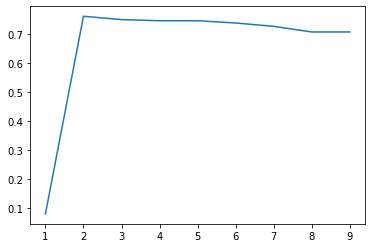

In [11]:
# Perform RFE to find optimal features to include

score = []
for i in range (1, 10):
    model = LogisticRegression(max_iter=10000)
    rfe = RFE(estimator=model, n_features_to_select=i, step=1)
    rfe.fit(X_train, y_train)
    y_rfe_pred = rfe.predict(X_test)
    print(rfe.support_)
    score.append(accuracy_score(y_test, y_rfe_pred))

print(score)
x=range(1, 10)
print(plt.plot(x, score))

- Accuracy peaks at 76% with two selected features, taxable income or loss and net tax

In [13]:
# Create a model with optimal features

model = LogisticRegression(max_iter=10000)
rfe = RFE(estimator=model, n_features_to_select=2, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=2)

In [14]:
# Display accuracy score of optimal model

rfe_pred = rfe.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, rfe_pred))

Accuracy Score:  0.7606177606177607


# Victoria

### Data Preparation

In [15]:
# Create a dataframe with only VIC values

df_vic = df[df['State/ Territory1'] == 'VIC']
df_vic

,Taxable status,State/ Territory1,Postcode,Number of individuals\nno.,Taxable income or loss3\nno.,Taxable income or loss3\n$,Tax on taxable income\nno.,Tax on taxable income\n$,Medicare levy\nno.,Medicare levy\n$,...,Low income tax offset\n$,Low and middle income tax offset\nno.,Low and middle income tax offset\n$,People with private health insurance\nno.,Private health insurance - your Australian Government rebate received\nno.,Private health insurance - your Australian Government rebate received\n$,Private health insurance rebate\nno.,Private health insurance rebate\n$,Excess private health reduction or refund (rebate reduced)\nno.,Excess private health reduction or refund (rebate reduced)\n$
1605,Non Taxable,VIC,3000,8564,8020,80423510,1749,1291913,23,32704,...,521647,679,102719,1590,879,531109,281,75488,45,12490
1606,Non Taxable,VIC,3001,492,491,1142734,9,10081,0,0,...,1308,2,876,12,9,8006,0,0,0,0
1607,Non Taxable,VIC,3002,632,595,7633881,166,347141,3,9109,...,36607,50,10556,380,285,253309,52,24803,20,10025
1608,Non Taxable,VIC,3003,1230,1161,12594637,274,213688,1,1802,...,71977,96,14646,320,189,134110,44,10651,18,6843
1609,Non Taxable,VIC,3004,1900,1766,19178469,461,583456,15,16452,...,118371,174,31171,906,679,593366,131,40348,41,22525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4979,Taxable,VIC,3992,369,369,22292399,369,4369302,342,415326,...,81431,359,257267,118,107,57339,11,4200,21,7182
4980,Taxable,VIC,3995,3799,3799,226145040,3799,44019784,3493,4167384,...,885790,3592,2587001,1229,1102,682226,122,33829,265,108293
4981,Taxable,VIC,3996,2288,2288,163433473,2288,36221598,2131,3083833,...,441932,2042,1486464,1266,1163,804091,76,25450,341,161286
4982,Taxable,VIC,8007,34,34,4121930,34,1233033,28,79352,...,2617,14,8207,26,22,13368,2,886,16,5607


In [16]:
# Take the first 20 columns (159 is too many)

drop = [*range(20, 159)]
df_vic.drop(df.columns[drop], axis=1, inplace=True)
df_vic.drop(df.columns[[0, 1]], axis=1, inplace=True)


# Remove string values from 'Postcode' and remove the single outlier

df_vic = df_vic[df_vic['Postcode'] != 'VIC other']
df_vic = df_vic[df_vic['Postcode'] != 8007]

df_vic

C:\Users\dylan\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Postcode,Number of individuals\nno.,Taxable income or loss3\nno.,Taxable income or loss3\n$,Tax on taxable income\nno.,Tax on taxable income\n$,Medicare levy\nno.,Medicare levy\n$,Medicare levy surcharge\nno.,Medicare levy surcharge\n$,Total Medicare levy liability\nno.,Total Medicare levy liability\n$,Net tax\nno.,Net tax\n$,HELP assessment debt\nno.,HELP assessment debt\n$,Salary or wages\nno.,Salary or wages\n$
1605,3000,8564,8020,80423510,1749,1291913,23,32704,1,242,0,0,0,0,2,4124,5921,66285786
1606,3001,492,491,1142734,9,10081,0,0,0,0,0,0,0,0,0,0,9,102990
1607,3002,632,595,7633881,166,347141,3,9109,1,153,0,0,0,0,0,0,268,2974100
1608,3003,1230,1161,12594637,274,213688,1,1802,1,901,0,0,0,0,1,1130,831,9137633
1609,3004,1900,1766,19178469,461,583456,15,16452,2,4643,0,0,0,0,0,0,903,10707638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4977,3990,68,68,4397267,68,897773,63,83443,4,5455,63,88898,68,900781,2,5768,52,3430331
4978,3991,163,163,9608992,163,1859102,143,169631,2,2670,143,172301,163,1754495,5,13961,136,7938153
4979,3992,369,369,22292399,369,4369302,342,415326,13,15268,342,430594,369,4347965,17,43340,309,18422267
4980,3995,3799,3799,226145040,3799,44019784,3493,4167384,115,156021,3493,4317808,3799,43475644,190,630189,3197,175585481


In [17]:
# Cluster postcodes

km = KMeans(n_clusters=4)
yp = km.fit_predict(df_vic)

df_vic['cluster'] = yp

df_vic

,Postcode,Number of individuals\nno.,Taxable income or loss3\nno.,Taxable income or loss3\n$,Tax on taxable income\nno.,Tax on taxable income\n$,Medicare levy\nno.,Medicare levy\n$,Medicare levy surcharge\nno.,Medicare levy surcharge\n$,Total Medicare levy liability\nno.,Total Medicare levy liability\n$,Net tax\nno.,Net tax\n$,HELP assessment debt\nno.,HELP assessment debt\n$,Salary or wages\nno.,Salary or wages\n$,cluster
1605,3000,8564,8020,80423510,1749,1291913,23,32704,1,242,0,0,0,0,2,4124,5921,66285786,0
1606,3001,492,491,1142734,9,10081,0,0,0,0,0,0,0,0,0,0,9,102990,0
1607,3002,632,595,7633881,166,347141,3,9109,1,153,0,0,0,0,0,0,268,2974100,0
1608,3003,1230,1161,12594637,274,213688,1,1802,1,901,0,0,0,0,1,1130,831,9137633,0
1609,3004,1900,1766,19178469,461,583456,15,16452,2,4643,0,0,0,0,0,0,903,10707638,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4977,3990,68,68,4397267,68,897773,63,83443,4,5455,63,88898,68,900781,2,5768,52,3430331,0
4978,3991,163,163,9608992,163,1859102,143,169631,2,2670,143,172301,163,1754495,5,13961,136,7938153,0
4979,3992,369,369,22292399,369,4369302,342,415326,13,15268,342,430594,369,4347965,17,43340,309,18422267,0
4980,3995,3799,3799,226145040,3799,44019784,3493,4167384,115,156021,3493,4317808,3799,43475644,190,630189,3197,175585481,0


### Model Creation

In [18]:
# Create a train/test split for logistic regression

train, test = train_test_split(df_vic, test_size=0.2, random_state=142)
print(train.shape, test.shape)

(1123, 19) (281, 19)


In [19]:
# Drop some columns and train on 'cluster'

X_train = train.drop(['Postcode', 'cluster'], axis=1)
y_train = train['cluster']
X_test = test.drop(['Postcode', 'cluster'], axis=1)
y_test = test['cluster']

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1123, 17) (1123,) (281, 17) (281,)


In [20]:
# Create the model and fit it 

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [21]:
model.predict(X_test)

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 3, 3, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 1, 0, 3, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 3, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0,
       3, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

### Model Evaluation

In [22]:
# Evaluate the accuracy score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Accuracy score on training set: ", accuracy_score(y_train, y_train_pred))
print("Accuracy score on testing set: ", accuracy_score(y_test, y_test_pred))

Accuracy score on training set:  0.8610863757791629
Accuracy score on testing set:  0.8113879003558719


### Feature Selection

[False False False False False False False False  True False False False
 False False False False False]
[False False False False False False  True False  True False False False
 False False False False False]
[False False False False  True False  True False  True False False False
 False False False False False]
[False False False False  True False  True False  True False False False
  True False False False False]
[False False False False  True False  True False  True False  True False
  True False False False False]
[False False False False  True False  True False  True False  True False
  True False  True False False]
[ True False False False  True False  True False  True False  True False
  True False  True False False]
[ True  True False False  True False  True False  True False  True False
  True False  True False False]
[ True  True  True False  True False  True False  True False  True False
  True False  True False False]
[ True  True  True False  True False  True False  True 

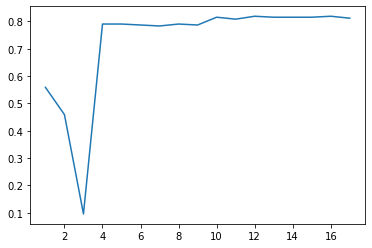

In [23]:
# Perform RFE to find optimal features to include

score = []
for i in range (1, 18):
    model = LogisticRegression(max_iter=20000)
    rfe = RFE(estimator=model, n_features_to_select=i, step=1)
    rfe.fit(X_train, y_train)
    y_rfe_pred = rfe.predict(X_test)
    print(rfe.support_)
    score.append(accuracy_score(y_test, y_rfe_pred))

print(score)
x=range(1, 18)
print(plt.plot(x, score))

- Accuracy peaks at 81.8% with 12 features

In [24]:
# Create a model with optimal features

model = LogisticRegression(max_iter=20000)
rfe = RFE(estimator=model, n_features_to_select=12, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(max_iter=20000), n_features_to_select=12)

In [25]:
# Display accuracy score of optimal model

rfe_pred = rfe.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, rfe_pred))

Accuracy Score:  0.8185053380782918
